## Visualization of parallel edges using plotnine
As some relationship involves multiple attributes (e.g., activation and phosphorylation), depicting multiple edges are desiable. Two functions are prepared for this purpose, outlined below.

In [8]:
import pykegg
import pandas as pd
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [9]:
import requests_cache

## Cache all the downloaded 
requests_cache.install_cache('pykegg_cache')

In [15]:
graph = pykegg.KGML_graph(pid = "hsa04110")

In [16]:
## Return segments
seg_df = pykegg.return_segments(graph)

In [17]:
## Edge position nudge
seg_df = pykegg.parallel_edges2(seg_df) # or, pykegg.parallel_edges()

In [18]:
## Select shown subtype
seg_df["subtype"] = seg_df.subtypes.apply(lambda x: x[0][0])

In [21]:
## Shorten lines
seg_df = seg_df.apply(lambda x: pykegg.shorten_end(x), axis=1)

In [22]:
node_df = graph.get_nodes(node_x_nudge=20,node_y_nudge=10)
node_df["graphics_name_sp"] = node_df.graphics_name.apply(lambda x: x.split(",")[0])

In [25]:
from plotnine import (
    ggplot,
    options,
    geom_point,
    geoms,
    aes,
    geom_segment,
    theme_void,
    geom_rect,
    geom_text,
)

options.figure_size = (12, 9)
plot = (
        ggplot()
        + geom_segment(
            aes(x="x", y="y", xend="xend", yend="yend", color="subtype"),
            data=seg_df,
            arrow=geoms.arrow(type="closed", length=0.05)
        )
        + geom_rect(
            aes(xmin="xmin", ymin="ymin", xmax="xmax", ymax="ymax"),
            data=node_df[node_df.original_type == "group"],
            color="black", alpha=0, fill="#ffffff"
            )
        + geom_rect(
            aes(xmin="xmin", ymin="ymin", xmax="xmax", ymax="ymax"),
            data=node_df[node_df.original_type == "gene"],
            color="black",
            fill=node_df[node_df.original_type == "gene"].bgcolor)
           +geom_text(
             aes(x="x",y="y", label="graphics_name_sp"),
               family="serif", size=8,
            data=node_df[node_df.original_type == "gene"],
            color="black"
           )
    )+theme_void()

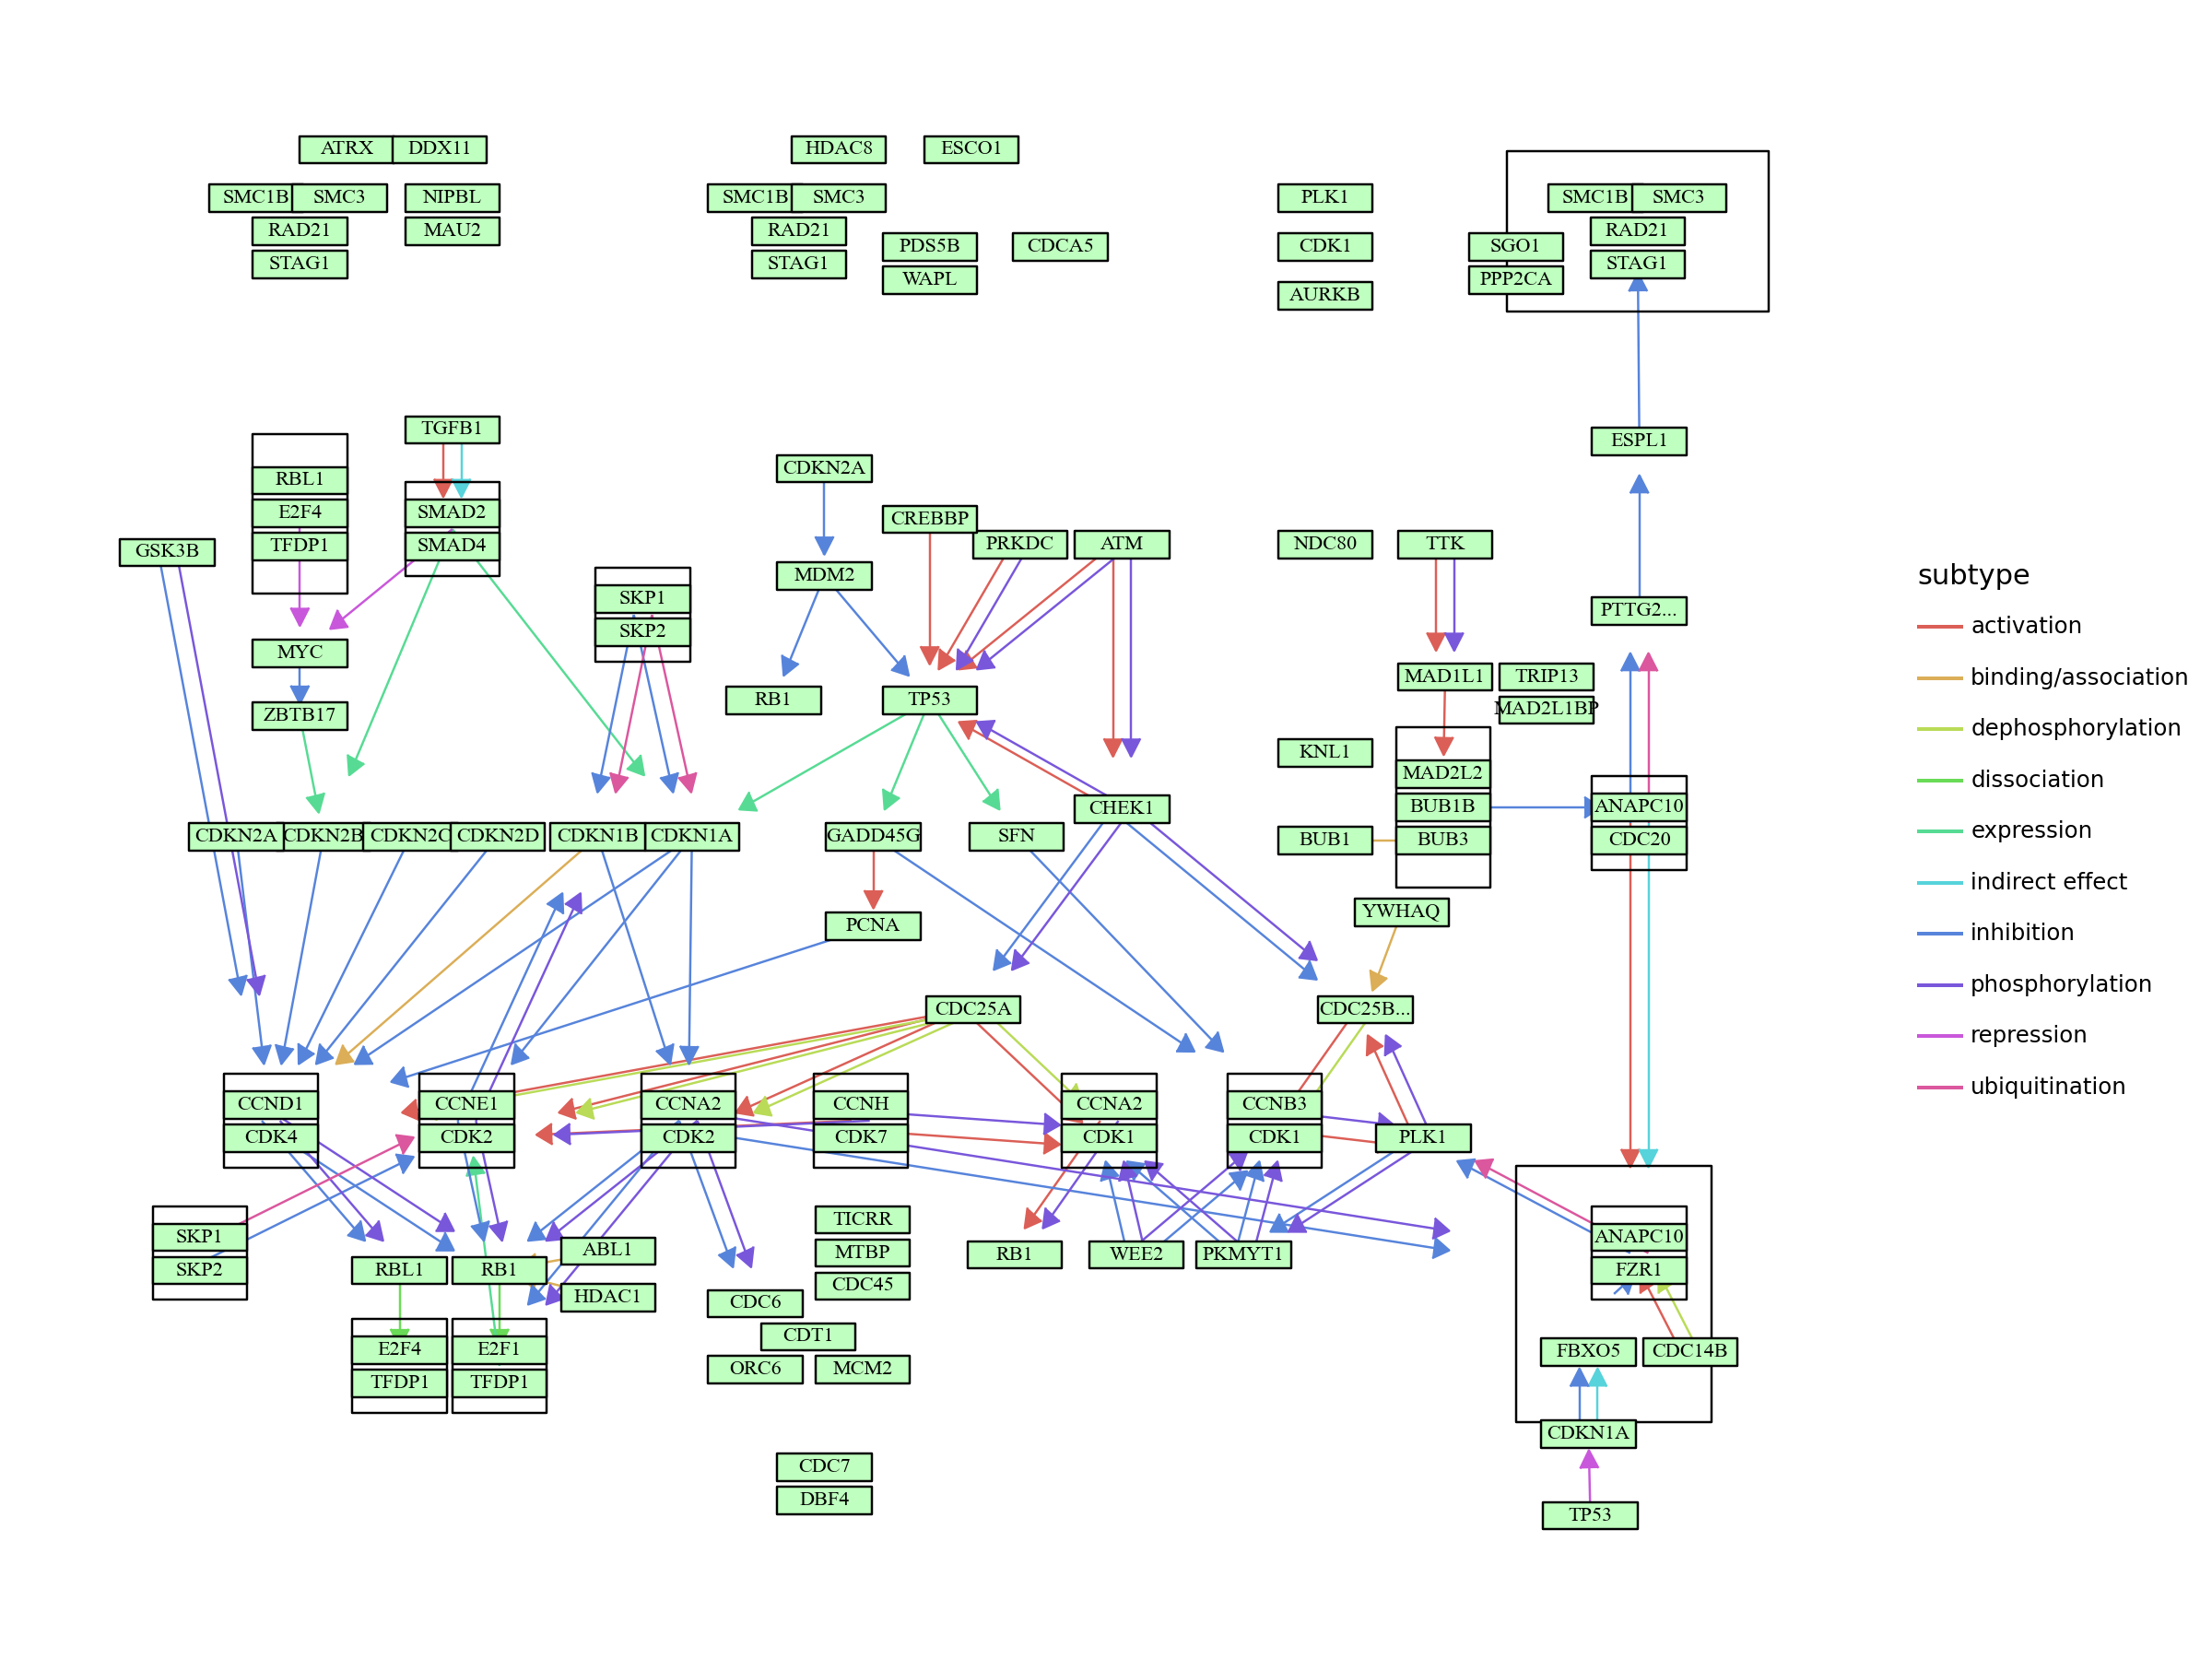

<Figure Size: (1200 x 900)>

In [26]:
plot